In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist



In [30]:
# read the data
train = pd.read_csv('rest_data.csv')

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   City Group  137 non-null    object 
 2   Type        137 non-null    object 
 3   P1          137 non-null    int64  
 4   P2          137 non-null    float64
 5   P3          137 non-null    float64
 6   P4          137 non-null    float64
 7   P5          137 non-null    int64  
 8   P6          137 non-null    int64  
 9   P7          137 non-null    int64  
 10  P8          137 non-null    int64  
 11  P9          137 non-null    int64  
 12  P10         137 non-null    int64  
 13  P11         137 non-null    int64  
 14  P12         137 non-null    int64  
 15  P13         137 non-null    float64
 16  P14         137 non-null    int64  
 17  P15         137 non-null    int64  
 18  P16         137 non-null    int64  
 19  P17         137 non-null    i

Skew is: 2.793478695162504


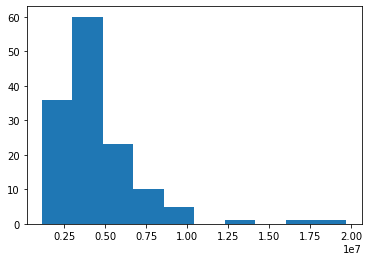

In [32]:
# the data is right skewed
print ("Skew is:", train.revenue.skew())
plt.hist(train["revenue"])
plt.show()

skew is 0.30740162838726504


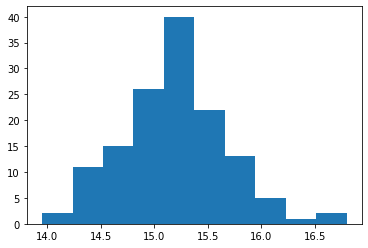

In [33]:
# applied the log transform to distrubute
target = np.log(train.revenue)
print('skew is', target.skew())
plt.hist(target)
plt.show()

In [34]:
# used corr() to find the correlatiion between the revenue data and others
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print("Positive Correlation:")
print(corr['revenue'].sort_values(ascending=False)[:], '\n')
print("\nNegative Correlation:")
print(corr['revenue'].sort_values(ascending=False)[-5:])

Positive Correlation:
revenue    1.000000
P2         0.191518
P28        0.155534
P6         0.139094
P21        0.097411
P11        0.084247
P22        0.083562
P1         0.070217
P17        0.067137
P7         0.051165
P23        0.045507
P25        0.036365
P4         0.035685
P19        0.027984
P24        0.014222
P20        0.014147
P14        0.006441
P15        0.000742
Id        -0.006277
P26       -0.007650
P27       -0.013680
P37       -0.019051
P3        -0.024613
P5        -0.028191
P33       -0.032426
P18       -0.034537
P16       -0.037997
P31       -0.040418
P35       -0.050156
P9        -0.050352
P36       -0.050534
P12       -0.062193
P32       -0.065857
P30       -0.066203
P34       -0.072343
P10       -0.073220
P8        -0.084215
P13       -0.105085
P29       -0.114846
Name: revenue, dtype: float64 


Negative Correlation:
P34   -0.072343
P10   -0.073220
P8    -0.084215
P13   -0.105085
P29   -0.114846
Name: revenue, dtype: float64


In [35]:
# selected only numbers columns
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [36]:
y = np.log(train.revenue)
X = data.drop(['revenue'], axis=1)

In [37]:
# divited the input data into teset and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

In [38]:

from sklearn import linear_model
lr = linear_model.LinearRegression()
# created the model
model = lr.fit(X_train, y_train)

In [39]:
# predicted using the created model
y_pred = model.predict(X_test)

In [40]:
# calulated the RMSE, others using sciket learn library
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test, y_pred)
print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.5714370715962254
MSE: 0.6324720936705962
RMSE: 0.7952811412768419
R-Squared: -1.1214103684400016


In [45]:
y1 = np.log(train.revenue)
# picked the most correlated value and created the regression model
X1 = data[['P2','P28','P6','P21','P11']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42, test_size=.2)
lr1 = linear_model.LinearRegression()
model1 = lr1.fit(X1_train, y1_train)
# predicted the model
y1_pred = model1.predict(X1_test)


In [46]:
# calulated the RMSE, others using sciket learn library
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y1_test, y1_pred)
mse = metrics.mean_squared_error(y1_test, y1_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test, y_pred)
print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.4194617239443305
MSE: 0.29953211678232305
RMSE: 0.5472952738534502
R-Squared: -1.1214103684400016
